In [1]:
import pandas as pd
import numpy as np
import os
import nltk
nltk.download("punkt")
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import zipfile
from sklearn.metrics import accuracy_score
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hanna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hanna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
myDocuments = 'clusteringMine/'
otherDocs1 = 'cluteringOther1/'
otherDocs2 = 'clusteringOther2/'
otherDocs3 = 'clusteringOther3/'

## reading the stop words list

In [3]:
stop_words = pd.read_csv('stop_words_english.txt', delimiter=',')
stop_words = list(stop_words['able'])

In [4]:
stop_words.append('able')

In [5]:
print(stop_words[0:20])

['about', 'above', 'abroad', 'according', 'accordingly', 'across', 'actually', 'adj', 'after', 'afterwards', 'again', 'against', 'ago', 'ahead', "ain't", 'all', 'allow', 'allows', 'almost', 'alone']


## reading the documents

In [6]:
def read_text(dir):
    
    # variable for the text
    corpus = ""
    
    # names of all the documents in the directories
    names = os.listdir(dir)
    
    # loop through names
    for name in names:
        
        # create a file path with the curent name
        file_path = dir + os.sep + name
        if name.endswith(".txt"):

            # open the file and read text
            with open(file_path, "rb") as f:
                content = f.read()
                content = str(content)
                    
                # add the text to corpus
                corpus = corpus + content
    
    # remove unwanted characters from the text
    corpus = corpus.replace("\\n", "")
    corpus = corpus.replace("\\", "")
    
    # case fold - lower the corpus
    corpus = corpus.lower()
    
    # remove stop words
    # list of stop words
    corpus = [word for word in corpus.split() if word.lower() not in stop_words]
    corpus = " ".join(corpus)
    

    # return the corpus
    return corpus

In [7]:
text1 = read_text(myDocuments)
text2 = read_text(otherDocs1)
text3 = read_text(otherDocs2)
text4 = read_text(otherDocs3)

In [8]:
#tokens
# tokens
text1 = text1.split(".")
text2 = text2.split(".")
text3 = text3.split(".")
text4 = text4.split(".")

In [9]:
# function to remove all the tokens that are shorter than threshold (100)
def clean_tokens(tokens):
    
    # empty list to grab tokens
    cleaned_tokens = []
    
    # toop through the tokens
    for token in tokens:
        
        # check if the length of the tokens is greater than the threshold
        if len(token) > 100:
            
            # append tokens
            cleaned_tokens.append(token)
            
    # return cleaned tokens
    return cleaned_tokens

In [10]:
# call clean_tokens
d1 = clean_tokens(text1)
d2 = clean_tokens(text2)
d3 = clean_tokens(text3)
d4 = clean_tokens(text4)

In [11]:
# make a dataframe out of tokens

# df for tokens
df1 = pd.DataFrame({"Tokens": d1, "id": 0})
df2 = pd.DataFrame({"Tokens": d2, "id": 1})
df3 = pd.DataFrame({"Tokens": d3, "id": 2})
df4 = pd.DataFrame({"Tokens": d4, "id": 3})

# join df1 to df4
df = pd.concat([df1, df2, df3, df4])

# shuffle the final df
df = df.sample(frac=1).reset_index(drop=True)

In [12]:
df.head()

,Tokens,id
0,studiesshow differences patterns reviewingby ...,1
1,ballrr[3rrxe2x80x98coded (tagged) dialogue dat...,3
2,observation basedon results:e usersxe2x80x99 ...,0
3,"there direct exefxacx80ect authorship, contrar...",2
4,"teo,xe2x80x9cdetection classification botnet ...",0


In [13]:
# Pre-process the text data
texts = [row.split() for row in df['Tokens']]

# Train the word2vec model on the pre-processed text data
model = Word2Vec(texts, window=10, min_count=1)

# Convert each row into an embedding by averaging the embeddings of the individual words
df['features'] = df['Tokens'].apply(lambda x: sum([model.wv[word] for word in x.split()]) / len(x.split()))

In [14]:
df.head()

,Tokens,id,features
0,studiesshow differences patterns reviewingby ...,1,"[-0.14466771, 0.021495752, 0.28775233, -0.2230..."
1,ballrr[3rrxe2x80x98coded (tagged) dialogue dat...,3,"[-0.090033464, 0.008237745, 0.18718694, -0.144..."
2,observation basedon results:e usersxe2x80x99 ...,0,"[-0.15048172, 0.068341486, 0.32743967, -0.2189..."
3,"there direct exefxacx80ect authorship, contrar...",2,"[-0.11641136, 0.033065353, 0.23358701, -0.1723..."
4,"teo,xe2x80x9cdetection classification botnet ...",0,"[-0.23923159, 0.26727542, 0.6201478, -0.399314..."


In [15]:
features = []

for i in range(len(df)):
    features.append(list(df['features'][i]))
x = pd.DataFrame(features)

In [16]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.144668,0.021496,0.287752,-0.223081,0.176871,-0.177525,0.025710,0.627835,0.116835,-0.220728,...,0.200930,0.038415,0.233575,-0.172497,0.437255,0.106103,0.409141,-0.062030,0.302878,0.249107
1,-0.090033,0.008238,0.187187,-0.144625,0.113914,-0.104698,0.012203,0.389561,0.080429,-0.141721,...,0.129119,0.017183,0.148618,-0.116430,0.273797,0.068754,0.252052,-0.030833,0.190510,0.152970
2,-0.150482,0.068341,0.327440,-0.218996,0.184376,-0.238696,0.039819,0.686353,0.074247,-0.255625,...,0.263824,0.044094,0.232984,-0.171994,0.479302,0.133875,0.404748,-0.064105,0.293737,0.224481
3,-0.116411,0.033065,0.233587,-0.172356,0.135850,-0.162405,0.026402,0.507549,0.075875,-0.183946,...,0.173119,0.032097,0.181524,-0.131196,0.356398,0.089243,0.319297,-0.050644,0.232655,0.187749
4,-0.239232,0.267275,0.620148,-0.399314,0.283086,-0.561569,0.145704,1.298723,0.017128,-0.525515,...,0.588394,0.145212,0.359564,-0.250044,0.921936,0.261697,0.647165,-0.137816,0.444911,0.313631


In [17]:
x['label'] = df['id'].copy()

In [18]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-0.144668,0.021496,0.287752,-0.223081,0.176871,-0.177525,0.025710,0.627835,0.116835,-0.220728,...,0.038415,0.233575,-0.172497,0.437255,0.106103,0.409141,-0.062030,0.302878,0.249107,1
1,-0.090033,0.008238,0.187187,-0.144625,0.113914,-0.104698,0.012203,0.389561,0.080429,-0.141721,...,0.017183,0.148618,-0.116430,0.273797,0.068754,0.252052,-0.030833,0.190510,0.152970,3
2,-0.150482,0.068341,0.327440,-0.218996,0.184376,-0.238696,0.039819,0.686353,0.074247,-0.255625,...,0.044094,0.232984,-0.171994,0.479302,0.133875,0.404748,-0.064105,0.293737,0.224481,0
3,-0.116411,0.033065,0.233587,-0.172356,0.135850,-0.162405,0.026402,0.507549,0.075875,-0.183946,...,0.032097,0.181524,-0.131196,0.356398,0.089243,0.319297,-0.050644,0.232655,0.187749,2
4,-0.239232,0.267275,0.620148,-0.399314,0.283086,-0.561569,0.145704,1.298723,0.017128,-0.525515,...,0.145212,0.359564,-0.250044,0.921936,0.261697,0.647165,-0.137816,0.444911,0.313631,0


In [19]:
x['label'].value_counts()

0    9052
1    3646
3    3578
2    1877
Name: label, dtype: int64

In [20]:
x_0 = x[x['label'] == 0].copy()
x_1 = x[x['label'] == 1].copy()
x_2 = x[x['label'] == 2].copy()
x_3 = x[x['label'] == 3].copy()

In [21]:
subset_0 = x_0.sample(n=30, random_state=np.random.RandomState())
subset_1 = x_1.sample(n=30, random_state=np.random.RandomState())
subset_2 = x_2.sample(n=30, random_state=np.random.RandomState())
subset_3 = x_3.sample(n=30, random_state=np.random.RandomState())

In [22]:
new_x = pd.concat([subset_0, subset_1, subset_2, subset_3])
new_x

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
3557,-0.114742,0.037757,0.239060,-0.175514,0.133395,-0.161740,0.027760,0.508496,0.074970,-0.182666,...,0.030921,0.178397,-0.134678,0.357657,0.089360,0.314947,-0.047773,0.229728,0.185815,0
17830,-0.197431,0.223092,0.440097,-0.278804,0.127196,-0.423465,0.141668,0.929730,-0.064490,-0.392493,...,0.137332,0.199147,-0.172911,0.674889,0.195962,0.429034,-0.133256,0.292120,0.156187,0
15771,-0.217285,0.121956,0.450746,-0.322238,0.238391,-0.361002,0.086693,0.994255,0.100272,-0.366153,...,0.082498,0.317343,-0.234892,0.704382,0.184829,0.577132,-0.111773,0.415449,0.337082,0
17957,-0.386112,0.216970,0.765363,-0.505600,0.426629,-0.665641,0.131573,1.737267,0.113876,-0.631763,...,0.133090,0.551213,-0.395629,1.222968,0.339398,1.004220,-0.223885,0.719441,0.546578,0
4179,-0.051831,0.041955,0.124615,-0.080653,0.058197,-0.099749,0.022612,0.260968,0.012561,-0.103250,...,0.025267,0.078685,-0.056588,0.182520,0.052052,0.144096,-0.029965,0.101163,0.070314,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15839,-0.047005,0.023780,0.108839,-0.071716,0.053976,-0.079967,0.015576,0.231305,0.018607,-0.086761,...,0.021360,0.079799,-0.054073,0.159171,0.043504,0.130753,-0.025075,0.092820,0.071584,3
2902,-0.319807,0.198182,0.674765,-0.433145,0.364440,-0.596011,0.112932,1.517667,0.066908,-0.555039,...,0.123342,0.482306,-0.330955,1.069606,0.294665,0.862803,-0.192398,0.610987,0.447815,3
5411,-0.077183,0.022225,0.155844,-0.115541,0.090765,-0.104697,0.022140,0.334924,0.049496,-0.119955,...,0.021258,0.118568,-0.087355,0.232982,0.058115,0.208161,-0.034039,0.155191,0.123793,3
4189,-0.299732,0.176518,0.633754,-0.425030,0.329366,-0.521765,0.111859,1.396463,0.098809,-0.517261,...,0.115454,0.439451,-0.319775,0.978562,0.266965,0.797220,-0.171661,0.569854,0.444069,3


In [23]:
# shuffle the final df
new_x = new_x.sample(frac=1).reset_index(drop=True)

In [24]:
pca = PCA(n_components=2)
pca.fit(new_x)
x_reduced_new = pca.transform(new_x)

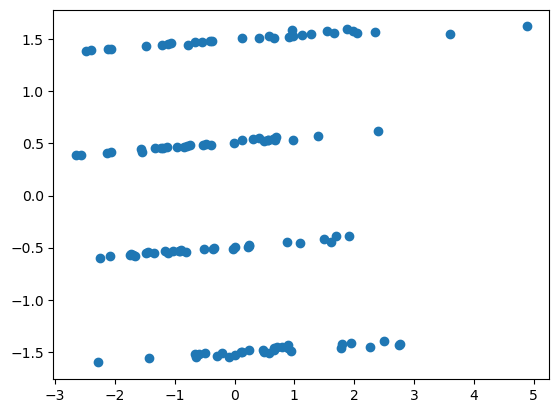

In [25]:
plt.scatter(x_reduced_new[:,0], x_reduced_new[:,1])


# Kmeans

In [26]:
kms = KMeans(n_clusters=4)
kms.fit(pd.DataFrame(x_reduced_new))

KMeans(n_clusters=4)

In [27]:
X_red_new_df = pd.DataFrame(x_reduced_new)

In [28]:
X_red_new_df

,0,1
0,-0.525875,0.484082
1,1.544349,1.582312
2,-1.131018,0.464060
3,-0.488220,-1.512492
4,0.567957,1.535574
...,...,...
115,-0.295286,-1.544274
116,0.552431,0.535647
117,-1.655428,-0.575774
118,2.500118,-1.398667


In [29]:
X_red_new_df['Kmeans'] = kms.labels_

<AxesSubplot:xlabel='0', ylabel='1'>

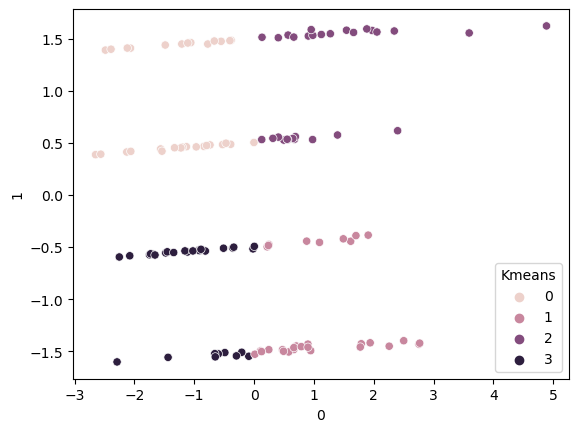

In [30]:
sns.scatterplot(data=X_red_new_df, x=0, y=1, hue='Kmeans')


In [31]:
X_prev_df = pd.DataFrame(x_reduced_new)

In [32]:
X_prev_df['label'] = new_x['label']

In [33]:
X_prev_df

,0,1,label
0,-0.525875,0.484082,2
1,1.544349,1.582312,3
2,-1.131018,0.464060,2
3,-0.488220,-1.512492,0
4,0.567957,1.535574,3
...,...,...,...
115,-0.295286,-1.544274,0
116,0.552431,0.535647,2
117,-1.655428,-0.575774,1
118,2.500118,-1.398667,0


<AxesSubplot:xlabel='0', ylabel='1'>

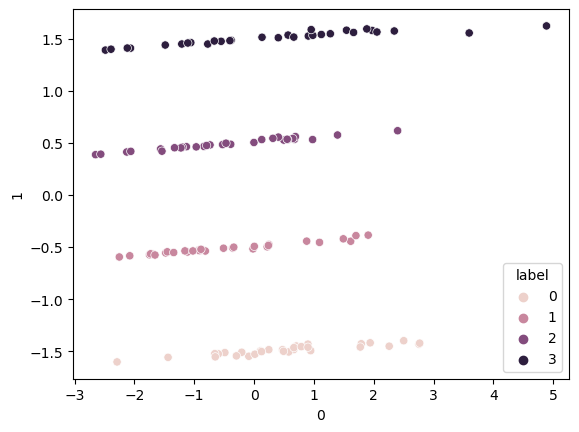

In [34]:
sns.scatterplot(data=X_prev_df, x=0, y=1, hue='label')